# Proyecto final - 15% del semestral

Grupo N°9

Integrantes:
Cineyris,
Nicole Valdés,
Emanuel González,
Alexander

Salón: 1IE-436
Entrega: 06 de marzo, 2025

## Tema: Eliminación de ruido en grabación de voz con transformada de Z (opción 1)

In [1]:
#Importación de librerías

import numpy as np
import scipy.signal as signal
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

In [2]:
print("Librerias cargadas exitosamente")

Librerias cargadas exitosamente


In [3]:
#Cargar el archivo de audio
sample_rate, audio = wav.read("Testaudio.wav")

In [4]:
print("Audio subido correctamente")

Audio subido correctamente


In [7]:
#Convertir a mono si es estéreo
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)

In [8]:
#Normalizar el audio
audio = audio / np.max(np.abs(audio))

In [9]:
#Diseño del filtro digital (Ejemplo: Pasa-bajo Butterworth)
cutoff_freq = 3000  # Frecuencia de corte en Hz
order = 6  # Orden del filtro
b, a = signal.butter(order, cutoff_freq / (sample_rate / 2), btype='low', analog=False)

In [10]:
# Aplicar el filtro al audio
audio_filtrado = signal.filtfilt(b, a, audio)

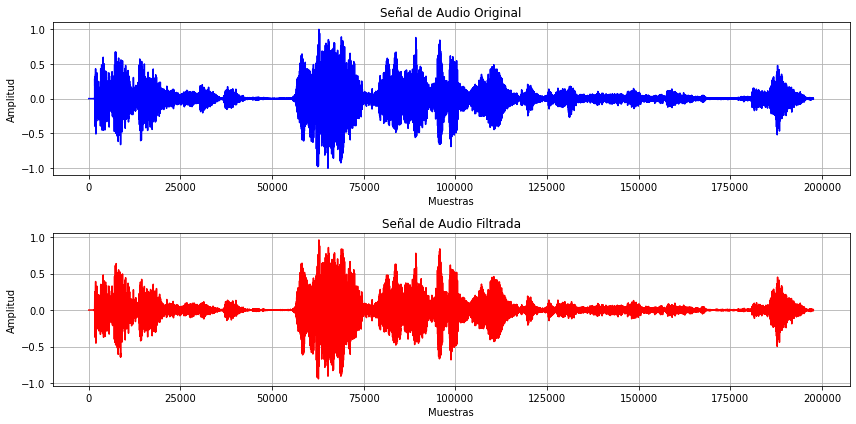

In [11]:
# Graficar las señales antes y después del filtrado
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(audio, color='blue')
plt.title("Señal de Audio Original")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(audio_filtrado, color='red')
plt.title("Señal de Audio Filtrada")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()

plt.tight_layout()
plt.show()

In [12]:
# Guardar el audio filtrado en formato compatible con Jupyter Notebook
from scipy.io.wavfile import write
import os

output_filename = "Testaudio.wav"
write(output_filename, sample_rate, (audio_filtrado * 32767).astype(np.int16))

In [13]:
# Mostrar enlaces de descarga en Jupyter Notebook
import IPython
from IPython.display import display, Audio, FileLink

display(Audio(output_filename, rate=sample_rate))
display(FileLink(output_filename))

C:\Users\Panama2021\Downloads\denoising\Testaudio.wav